<a href="https://www.kaggle.com/code/justinzhang/titanic-justin?scriptVersionId=129304778" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Metadata of Titantic Data Set
[Reference](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf)

VARIABLE DESCRIPTIONS

* Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival Survival (0 = No; 1 = Yes)
* name Name
* sex Sex
* age Age
* sibsp Number of Siblings/Spouses Aboard
* parch Number of Parents/Children Aboard
* ticket Ticket Number
* fare Passenger Fare (British pound)
* cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
# Function - fill missing value of a numerical column "colname" in data frame "df" by randomly generated values based on the distribution of existing 
#            values (assume normal distribution) of "total" data frame

def filling_by_distribution(total, df, colname):

    # Calculate the mean and standard deviation of column A
    mean = total[colname].mean()
    std = total[colname].std()

    # Generate random samples from a normal distribution with the calculated mean and standard deviation
    samples = np.random.normal(mean, std, df[colname].isnull().sum())

    # Replace missing values with the generated samples
    df.loc[df[colname].isnull(), colname] = samples
    return df

In [3]:

def plot_missing_value(train):
    plt.figure()
    df_na = train.isna().sum().reset_index(name="missing value")
    labels = df_na.loc[:,'index']
    values = df_na.loc[:,'missing value']
    plt.bar(labels, values)
    plt.xticks(rotation=45)
    plt.show()

def format_ppt(msg):
    print('\033[1m' + msg + '\033[0m')

top 5 rows
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN   

<Figure size 640x480 with 0 Axes>

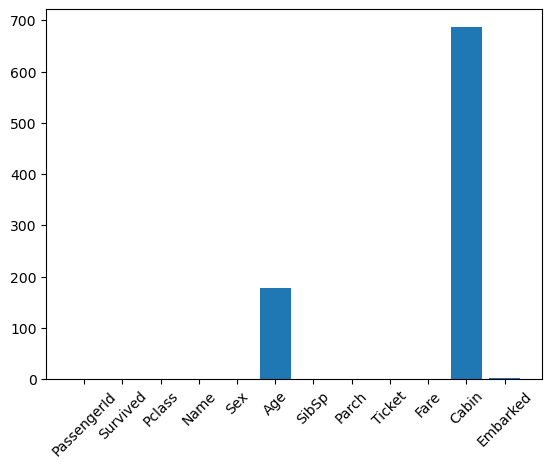

Remove column Cabin due to the majority of missing values
Filling missing values of column Age according to distribution of existing values
missing values by removing Column Cabin and filling missing values of Age


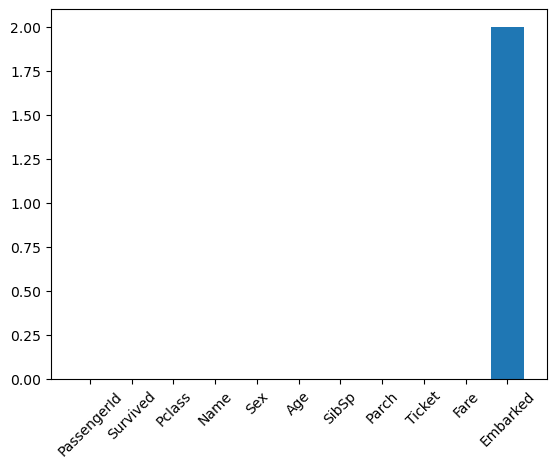

Filling missing values of column Embarked based on the frequency (mode) of existing values
missing values after filling missing values of Embarked


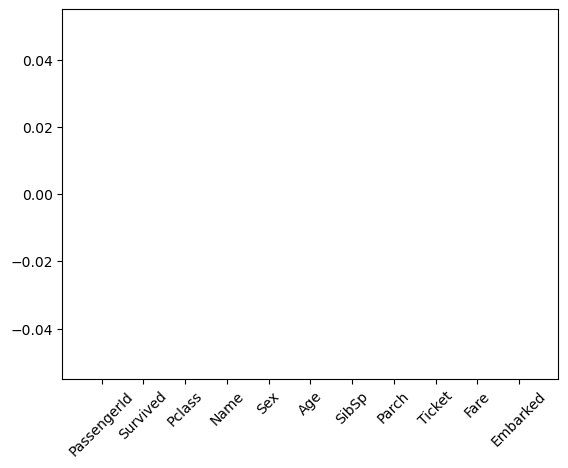

frequency counts of non numeric columns
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
Sex
male      577
female    314
Name: Sex, dtype: int64
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64
info of training table
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 t

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

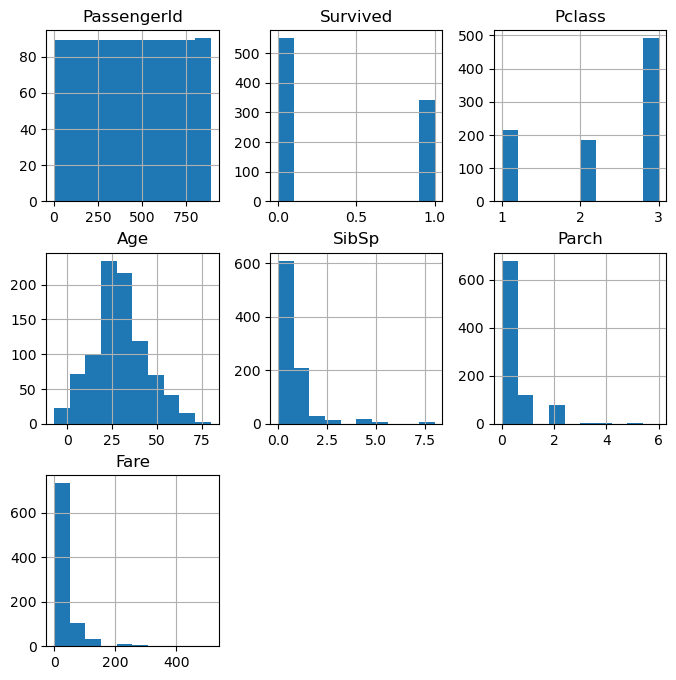

In [4]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
display(HTML('<h1><b><center>Titantic Data</center></b></h1>'))

format_ppt('top 5 rows')
print(train.head(5))
plt.figure()
g = train.columns.to_series().groupby(train.dtypes).groups
#print(g.keys())
format_ppt('top 5 rows of non numeric columns')
print(train.select_dtypes(include=['object']).head())
format_ppt('describe numeric columns')
print(train.describe())
format_ppt('describe non numeric columns')
print(train.describe(exclude=[np.number])  )
format_ppt('describe Age column group by Sex')
print(train.groupby(["Sex"])['Age'].describe())

format_ppt('missing values')
plot_missing_value(train)

format_ppt('Remove column Cabin due to the majority of missing values')
train.drop(['Cabin'], axis=1, inplace=True)
format_ppt('Filling missing values of column Age according to distribution of existing values')

train = filling_by_distribution(pd.concat([train, test]), train, "Age")

format_ppt('missing values by removing Column Cabin and filling missing values of Age')
plot_missing_value(train)

format_ppt('Filling missing values of column Embarked based on the frequency (mode) of existing values')
mode = train['Embarked'].mode()[0]
#print(mode)
# Replace missing values with the mode
train['Embarked'].fillna(mode, inplace=True)

format_ppt('missing values after filling missing values of Embarked')
plot_missing_value(train)

format_ppt('frequency counts of non numeric columns')
df_object = train.select_dtypes(include=['object'])
for c1 in range(len(df_object.columns)):
    print(df_object.columns[c1])
    df1 = df_object.iloc[:,c1].fillna('na').value_counts()
    print(df1)
format_ppt('info of training table')
print(train.info())
format_ppt('histogram of each column in training table')
train.hist(bins=10, figsize=(8,8))


